In [7]:
from qiskit import QuantumCircuit, transpile
# from qiskit.providers.aer import QasmSimulator
# from qiskit.providers.basicaer import QasmSimulatorPy
from qiskit_aer import AerSimulator
from qiskit.providers.fake_provider import FakeManila, FakeToronto, FakeJakartaV2
from qiskit.circuit import Parameter
from qiskit.circuit.library import PauliEvolutionGate
from qiskit.synthesis import QDrift, LieTrotter, SuzukiTrotter

import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import sklearn.preprocessing as skp
from scipy.signal import savgol_filter
import scipy
import os
import sys
import itertools
from numpy.random import Generator, PCG64
from datetime import date
import pathlib
import inspect
import time

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

module_path = os.path.abspath(os.path.join('..')) # qrc_surrogate
sys.path.append(module_path)
fig_path = f'{module_path}/figs'


from src.feedforward import QExtremeLearningMachine, CPolynomialFeedforward
from src.rewinding import QRewindingRC, QRewindingStatevectorRC
from src.data import DataSource

# Restarting Circuit

In [8]:
input_label = 'a' # x a
output_label = 's' # y s

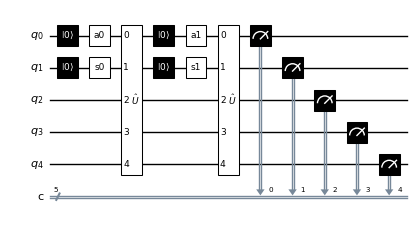

In [9]:
t = 2
nqubits = 5
qin = [0, 1]

qc = QuantumCircuit(nqubits, nqubits)

for prevstep in range(0, t):
    # reset
    qc.reset(qin)
    # input
    qc.unitary(obj=np.eye(2), qubits=[0], label=f'{input_label}{prevstep}')
    qc.unitary(obj=np.eye(2), qubits=[1], label=f'{output_label}{prevstep}')
    # unitary
    qc.unitary(obj=np.eye(2**nqubits), qubits=[*range(nqubits)], label=r'$\hat{U}$')
    # qc.barrier([*range(nqubits)])
# measure
qc.measure([*range(nqubits)], [*range(nqubits)])

# draw
# text, mpl, latex, latex_source
qc.draw(
    output='mpl',
    filename=f'{fig_path}/restarting_circuit_t{t}.svg',
    scale=0.5,
    style='bw', # iqx bw
)

# Ising

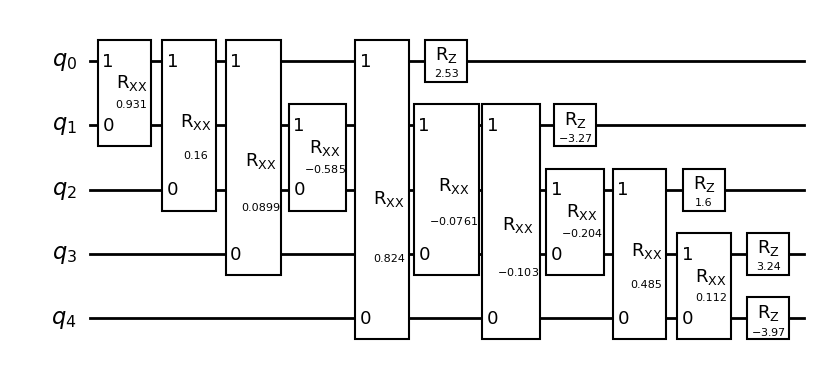

In [10]:
# the 'random unitary' that works best in practice 
# is the fully connected ising model

from circuits import ising_circuit

ising = ising_circuit(nqubits=5, rseed=9369)

ising.draw(
    output='mpl',
    filename=f'{fig_path}/ising_circuit.svg',
    # scale=0.5,
    style='bw', # iqx bw
)

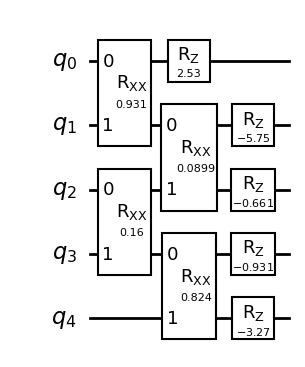

In [11]:
# the 'random unitary' that works best in practice 
# is the fully connected ising model

from src.circuits import ising_circuit

ising = ising_circuit(nqubits=5, rseed=9369, mode='nn')

ising.draw(
    output='mpl',
    filename=f'{fig_path}/ising_nn_circuit.svg',
    # scale=0.5,
    style='bw', # iqx bw
)